## Reto 4: Graficando múltiples axis

### 1. Objetivos:
    - Usar subplots para graficar múltiples gráficas de barras al mismo tiempo
 
---
    
### 2. Desarrollo:

En el Reto pasado generamos tablas de contingencia para segmentar nuestros datos usando dos o más variables categóricas. El problema con nuestras gráficas es que resultaba muy incómodo e ineficiente compararlas. Una manera mucho más efectiva de comparar varias gráficas es graficarlas en la misma figura. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea una tabla de contingencia donde el índice esté dado por la variable 'region_name' y las columnas por la variable 'type'. Esto nos va a dar una tabla donde tenemos la frecuencia de cada tipo de propiedad segmentada por regiones.
3. Genera una figura con 8 subplots para hacer gráficas de barras de cada región en nuestro dataset. Cada gráfica tendrá 3 barras, correspondiendo a los tipos 'h', 't' y 'u'.
4. Asegúrate de que compartan eje `x` y `y` para que sea fácil compararlas. Además agrega anotaciones y títulos donde creas necesario.
5. Describe tus hallazgos y comparte con tus compañeros qué podrían significar.

In [3]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/melbourne_housing-clean.csv", index_col=0)

In [5]:
crossTable = pd.crosstab(df['region_name'], df['type'])
print(crossTable)

type                           h    t     u
region_name                                
Eastern Metropolitan         863  102   159
Eastern Victoria              33    0     3
Northern Metropolitan       2332  290   796
Northern Victoria             21    1     0
South-Eastern Metropolitan   224   20    28
Southern Metropolitan       2360  386  1478
Western Metropolitan        1908  226   394
Western Victoria              21    0     1


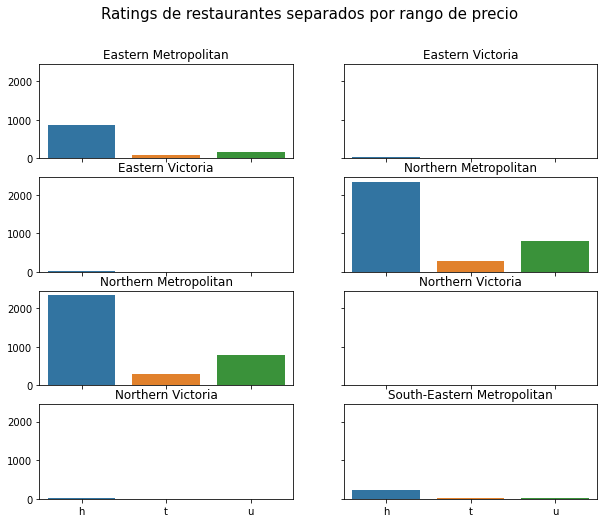

In [36]:
numPlots = 8; cols=4; rows = 2;
fig, axes = plt.subplots(cols, rows, figsize=(10, 8), sharex=True, sharey=True)

for iax in range(cols):
  for jax in range(rows):
    index = crossTable.index[iax+jax]
    sbn.barplot(x=crossTable.columns, y=crossTable.loc[index], ax=axes[iax, jax])
    axes[iax, jax].set(xlabel='', ylabel='', title=f'{crossTable.index[iax+jax]}')


fig.suptitle('Ratings de restaurantes separados por rango de precio', fontsize=15);

<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
regionname_type = pd.crosstab(df['region_name'], [df['type']])

fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)

sns.barplot(regionname_type.loc['Eastern Metropolitan'].index, regionname_type.loc['Eastern Metropolitan'], ax=axes[0, 0])
sns.barplot(regionname_type.loc['Eastern Victoria'].index, regionname_type.loc['Eastern Victoria'], ax=axes[0, 1])
sns.barplot(regionname_type.loc['Northern Metropolitan'].index, regionname_type.loc['Northern Metropolitan'], ax=axes[0, 2])
sns.barplot(regionname_type.loc['Northern Victoria'].index, regionname_type.loc['Northern Victoria'], ax=axes[0, 3])
sns.barplot(regionname_type.loc['South-Eastern Metropolitan'].index, regionname_type.loc['South-Eastern Metropolitan'], ax=axes[1, 0])
sns.barplot(regionname_type.loc['Southern Metropolitan'].index, regionname_type.loc['Southern Metropolitan'], ax=axes[1, 1])
sns.barplot(regionname_type.loc['Western Metropolitan'].index, regionname_type.loc['Western Metropolitan'], ax=axes[1, 2])
sns.barplot(regionname_type.loc['Western Victoria'].index, regionname_type.loc['Western Victoria'], ax=axes[1, 3])
```
    
</details>